In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)
    

586

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | bosaso
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | half moon bay
Processing Record 21

City not found. Skipping...
Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | luwuk
Processing Record 39 of Set 4 | romny
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | salumbar
Processing Record 42 of Set 4 | mukhen
Processing Record 43 of Set 4 | neyshabur
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | iquitos
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | trinidad
Processing Record 49 of Set 4 | arman
Processing Record 50 of Set 4 | urengoy
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | riyadh
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | fort nelson
Processing Record 5 of Set 5 | heihe
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | aracoiaba
Processing Record 8 of Set 5 | kaeo
Processing Record 9 of Set 5 | warmbad
Processing Record 10 of Set 5 | saint-augus

Processing Record 30 of Set 8 | flin flon
Processing Record 31 of Set 8 | gawler
Processing Record 32 of Set 8 | saskylakh
Processing Record 33 of Set 8 | lufilufi
Processing Record 34 of Set 8 | kitzingen
Processing Record 35 of Set 8 | ponta delgada
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | general roca
Processing Record 38 of Set 8 | uvinza
Processing Record 39 of Set 8 | inuvik
Processing Record 40 of Set 8 | noumea
Processing Record 41 of Set 8 | yaring
Processing Record 42 of Set 8 | homer
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | zhuhai
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | barbar
City not found. Skipping...
Processing Record 47 of Set 8 | chase
Processing Record 48 of Set 8 | acurenam
Processing Record 49 of Set 8 | cabedelo
Processing Record 50 of Set 8 | zhigansk
Processing Record 1 of Set 9 | yulara
Processing Record 2 of Set 9 | port macquarie
Processing Record 3 of Set 9 | namatan

Processing Record 17 of Set 12 | gazli
Processing Record 18 of Set 12 | sal rei
Processing Record 19 of Set 12 | senno
Processing Record 20 of Set 12 | itagi
Processing Record 21 of Set 12 | sobolevo
Processing Record 22 of Set 12 | port pirie
Processing Record 23 of Set 12 | mitzic
Processing Record 24 of Set 12 | hashtrud
Processing Record 25 of Set 12 | saldanha
Processing Record 26 of Set 12 | oktyabrskiy
Processing Record 27 of Set 12 | standerton
Processing Record 28 of Set 12 | marawi
Processing Record 29 of Set 12 | rovaniemi
Processing Record 30 of Set 12 | charters towers
Processing Record 31 of Set 12 | puerto madryn
Processing Record 32 of Set 12 | divnomorskoye
Processing Record 33 of Set 12 | grand centre
City not found. Skipping...
Processing Record 34 of Set 12 | hurghada
Processing Record 35 of Set 12 | chapais
Processing Record 36 of Set 12 | poum
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

541

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,73.92,46,20,10.36,CA,2022-07-12 00:31:36
1,Port Alfred,-33.5906,26.8910,57.06,73,0,9.60,ZA,2022-07-12 00:34:55
2,Barrow,71.2906,-156.7887,37.42,87,100,12.66,US,2022-07-12 00:34:56
3,Kaitangata,-46.2817,169.8464,45.55,88,100,17.07,NZ,2022-07-12 00:34:56
4,Mataura,-46.1927,168.8643,45.48,87,100,10.60,NZ,2022-07-12 00:34:56
5,Rikitea,-23.1203,-134.9692,74.70,73,0,12.37,PF,2022-07-12 00:34:57
6,Cherskiy,68.7500,161.3000,78.42,33,91,13.06,RU,2022-07-12 00:33:13
7,Hasaki,35.7333,140.8333,81.28,83,100,4.12,JP,2022-07-12 00:34:57
8,Avarua,-21.2078,-159.7750,77.05,65,100,4.61,CK,2022-07-12 00:34:58
9,Punta Arenas,-53.1500,-70.9167,30.31,80,75,12.66,CL,2022-07-12 00:30:16


In [10]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-07-12 00:31:36,62.4560,-114.3525,73.92,46,20,10.36
1,Port Alfred,ZA,2022-07-12 00:34:55,-33.5906,26.8910,57.06,73,0,9.60
2,Barrow,US,2022-07-12 00:34:56,71.2906,-156.7887,37.42,87,100,12.66
3,Kaitangata,NZ,2022-07-12 00:34:56,-46.2817,169.8464,45.55,88,100,17.07
4,Mataura,NZ,2022-07-12 00:34:56,-46.1927,168.8643,45.48,87,100,10.60
5,Rikitea,PF,2022-07-12 00:34:57,-23.1203,-134.9692,74.70,73,0,12.37
6,Cherskiy,RU,2022-07-12 00:33:13,68.7500,161.3000,78.42,33,91,13.06
7,Hasaki,JP,2022-07-12 00:34:57,35.7333,140.8333,81.28,83,100,4.12
8,Avarua,CK,2022-07-12 00:34:58,-21.2078,-159.7750,77.05,65,100,4.61
9,Punta Arenas,CL,2022-07-12 00:30:16,-53.1500,-70.9167,30.31,80,75,12.66


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

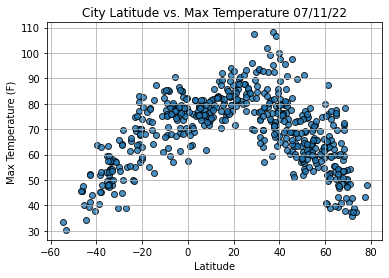

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

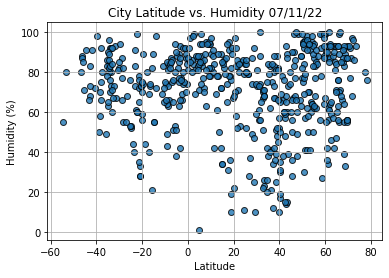

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

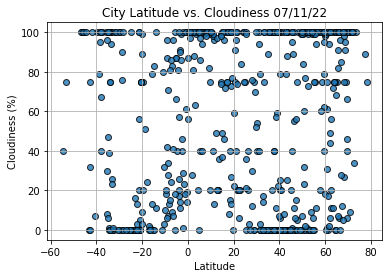

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

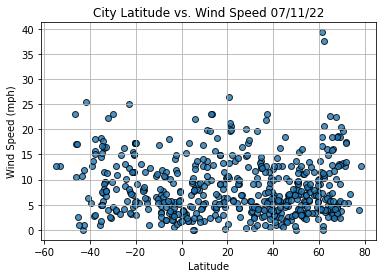

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()